# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

##EDA

Let us first get an overall big picture to find out the distributions of variables and the inter-correlation of various variables in the dataset through histograms,correlation matrices and pair-plots:

###VARIABLE DISTRIBUTIONS

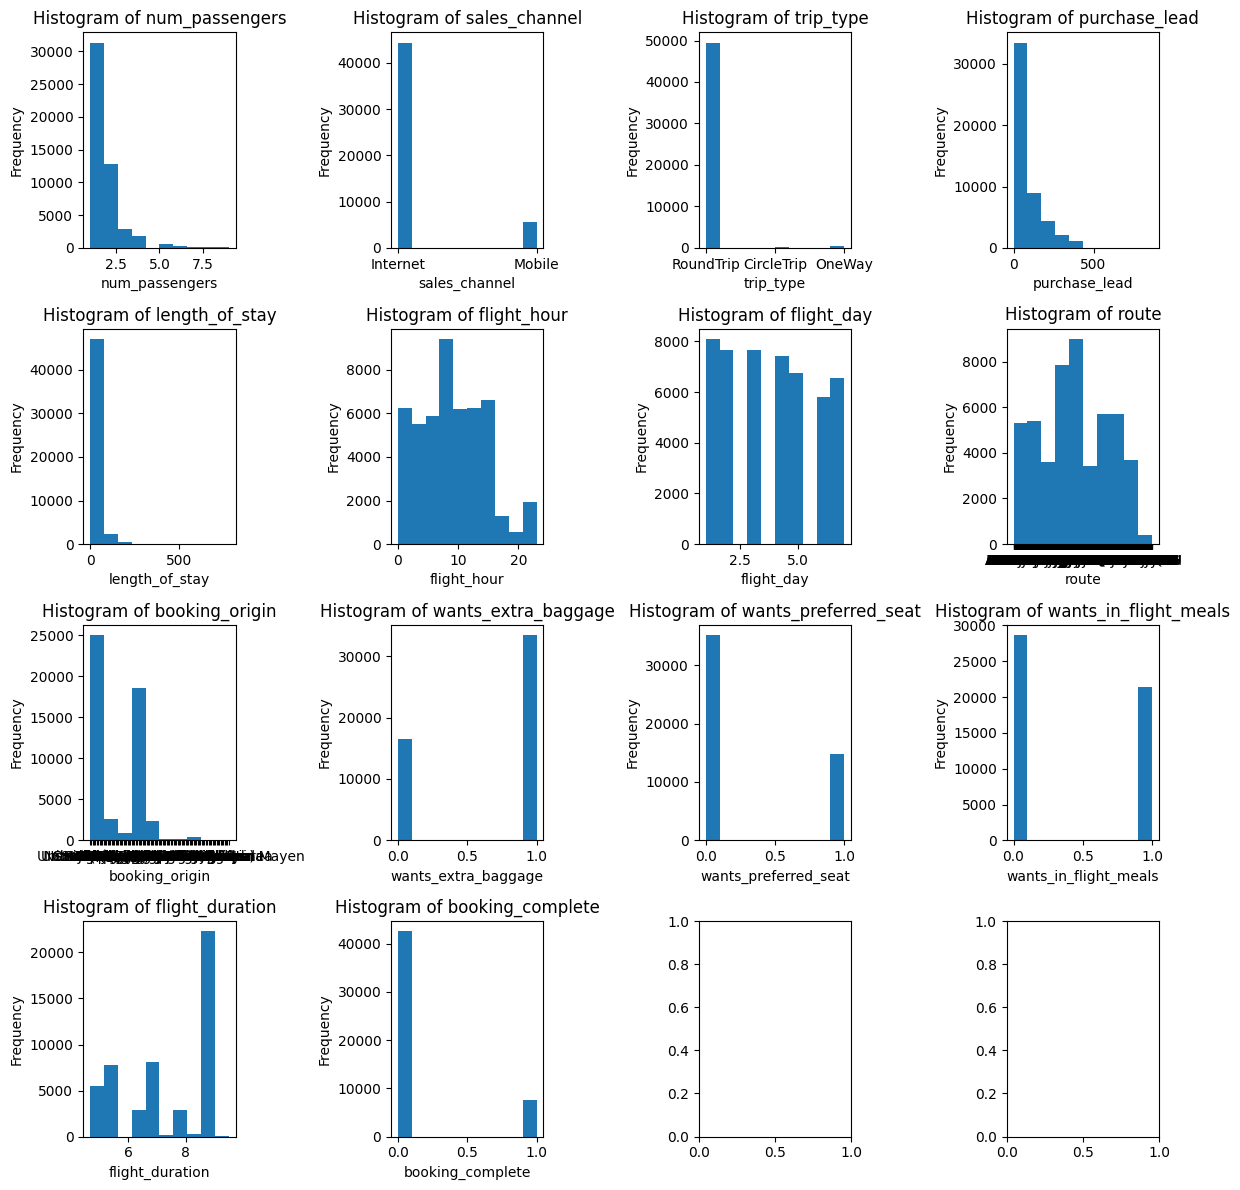

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of rows and columns in the grid
num_rows = 4
num_cols = 4

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Iterate over columns and create histograms
for i, column in enumerate(df.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.hist(df[column], bins=10)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

###VARIABLE RELATIONSHIPS

<ipython-input-12-d3f5d74099f0>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


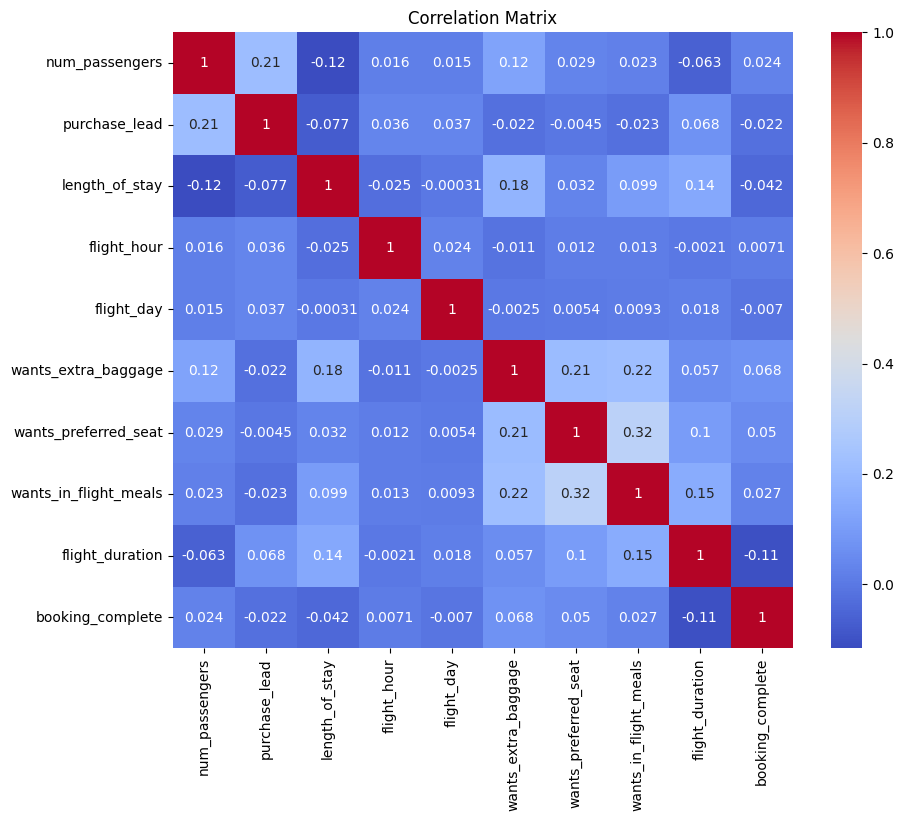

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Heatmap (correlation matrix)
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Let us get an in-depth view of how these variables are plotted wrt eachother through a pair plot:



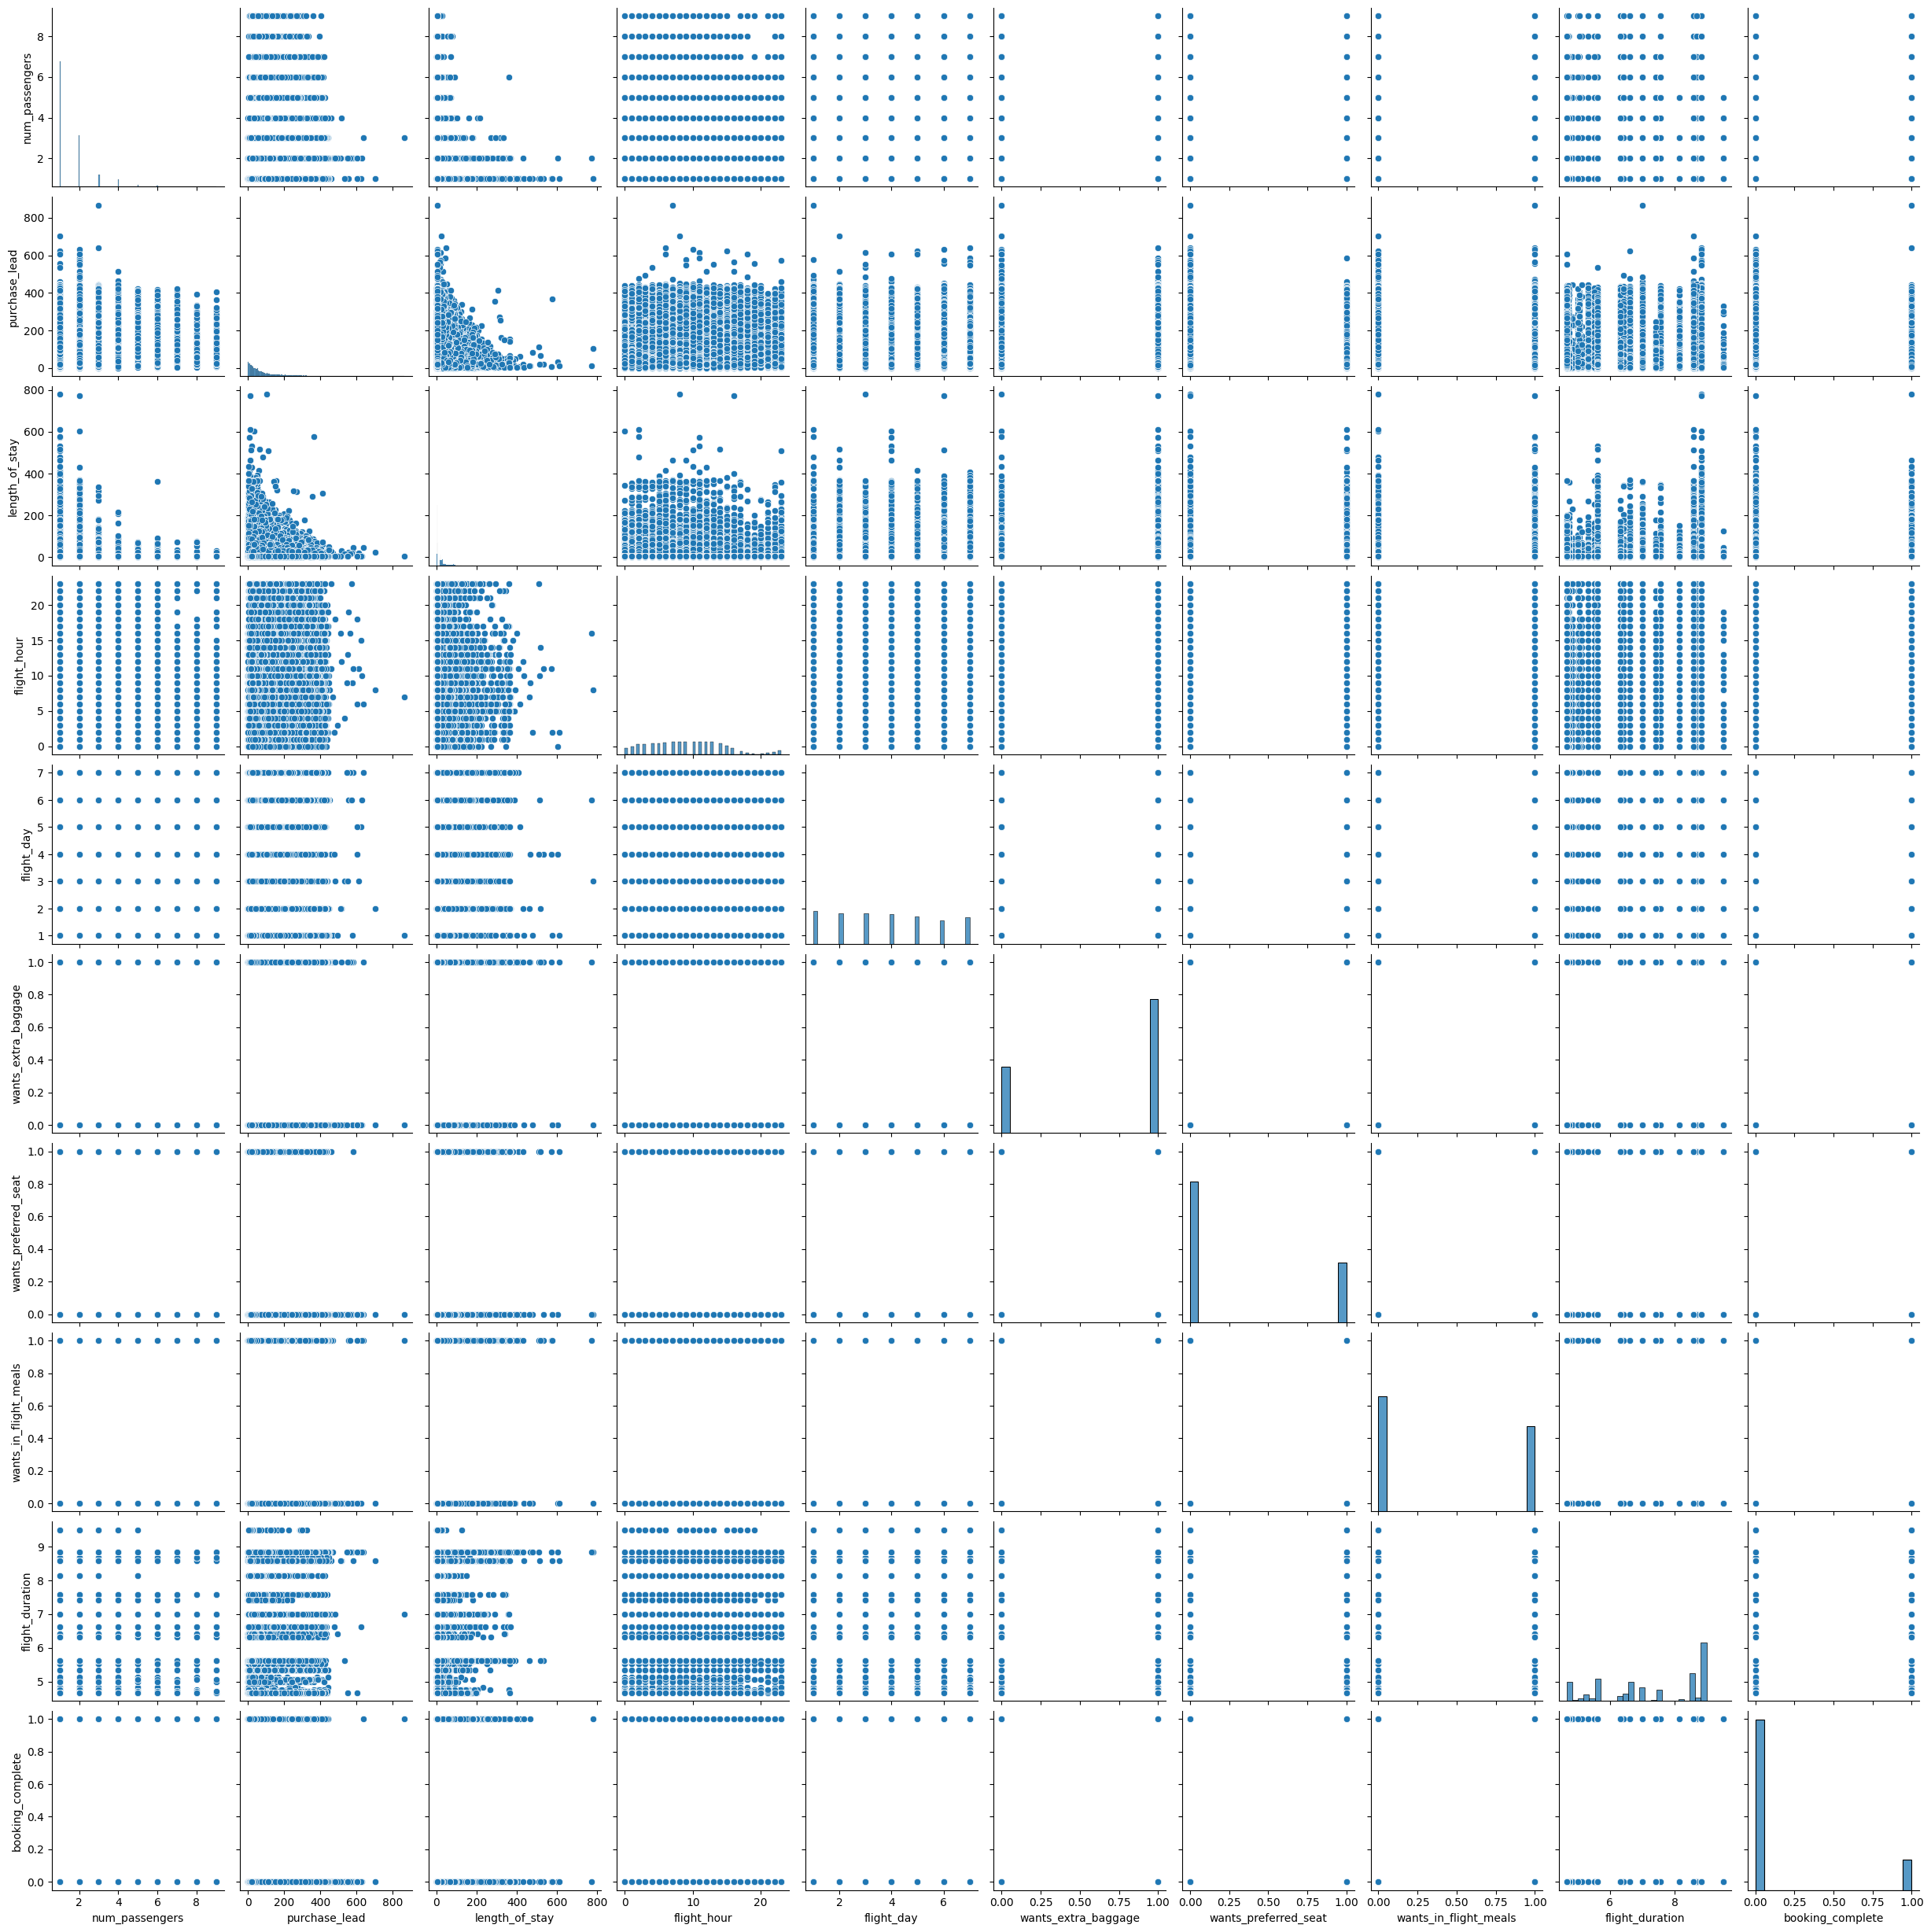

In [ ]:
import pandas as pd
import seaborn as sns

# Select only the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Create a pair plot
sns.pairplot(numerical_columns)

# Show the plot
plt.show()

purchase_lead and length_of_stay seem to have a download slope. This negative correlation could indicate that customers who make their purchase earlier (lower "purchase_lead" value) tend to have a longer stay (higher "length_of_stay"), and vice versa.

###OUTLIER DETECTION AND REMOVAL

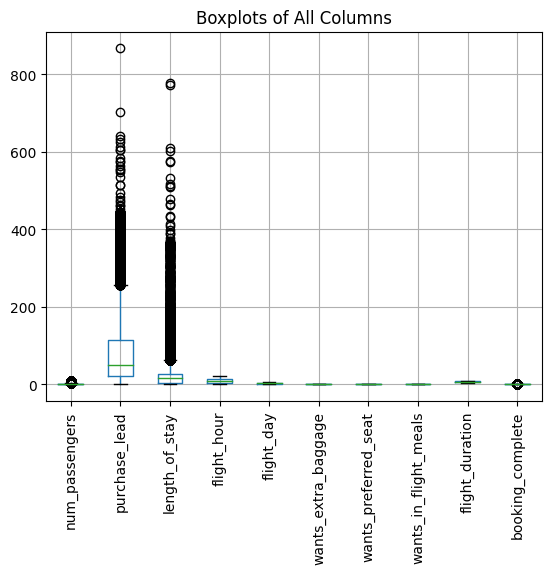

In [ ]:
import matplotlib.pyplot as plt

# Create a boxplot for each column in the DataFrame
df.boxplot()

# Set the title of the plot
plt.title('Boxplots of All Columns')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


Let us use the z-score method to remove these outliers:

In [ ]:
import numpy as np
from scipy.stats import zscore

# Calculate z-scores for purchase_lead and length_of_stay columns
z_scores_purchase_lead = np.abs(zscore(df['purchase_lead']))
z_scores_length_of_stay = np.abs(zscore(df['length_of_stay']))

# Define threshold for outlier detection
z_score_threshold = 3

# Create boolean masks to identify outliers
outliers_purchase_lead = z_scores_purchase_lead > z_score_threshold
outliers_length_of_stay = z_scores_length_of_stay > z_score_threshold

# Remove outliers from the DataFrame
df_no_outliers = df[~(outliers_purchase_lead | outliers_length_of_stay)]


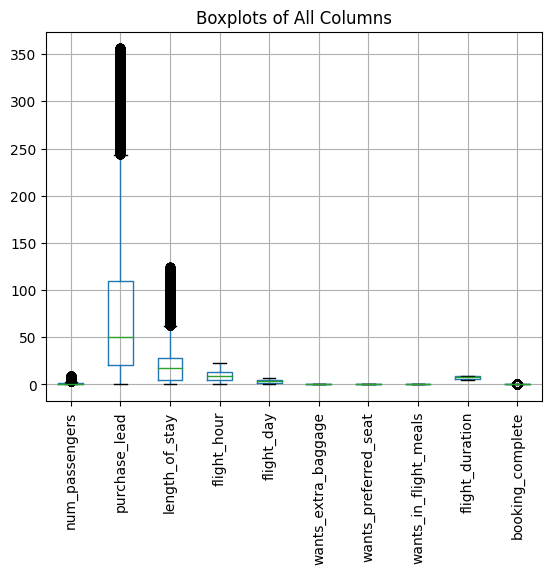

In [ ]:
import matplotlib.pyplot as plt

# Create a boxplot for each column in the DataFrame
df_no_outliers.boxplot()

# Set the title of the plot
plt.title('Boxplots of All Columns')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()

###MULTIVARIABLE EDA

In [ ]:
# Multi-Variable EDA
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['column1'], df['column2'])
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Scatter Plot of Column 1 vs Column 2')
plt.show()

###TIME-BASED ANALYSIS

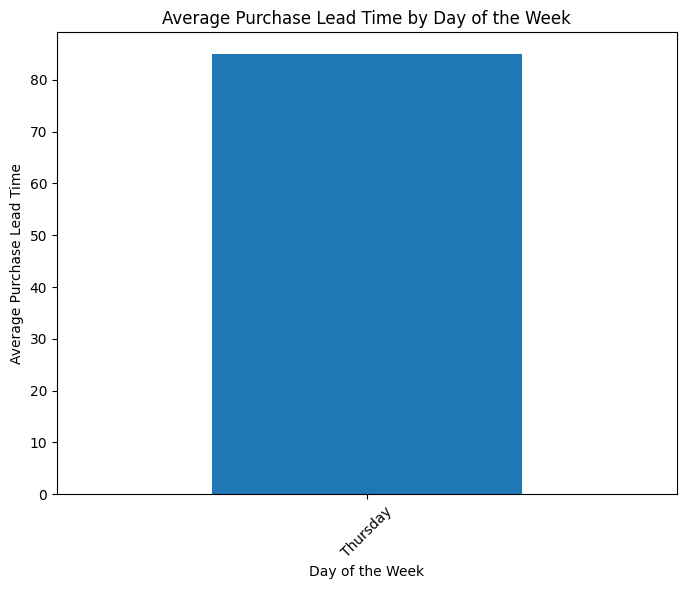

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert flight_day column to datetime
df['flight_day'] = pd.to_datetime(df['flight_day'])

# Group data by day of the week
grouped_data = df.groupby(df['flight_day'].dt.day_name())

# Calculate the average purchase lead time per day of the week
avg_purchase_lead = grouped_data['purchase_lead'].mean()

# Plot the average purchase lead time by day of the week
plt.figure(figsize=(8, 6))
avg_purchase_lead.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Purchase Lead Time')
plt.title('Average Purchase Lead Time by Day of the Week')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Retrieve the average purchase lead time for Thursday
avg_purchase_lead_thursday = avg_purchase_lead['Thursday']
print("Average Purchase Lead Time on Thursday:", avg_purchase_lead_thursday)

Average Purchase Lead Time on Thursday: 84.94048


Looks like most of the customers like to buy their tickets 84 days before their flight on a thursday.

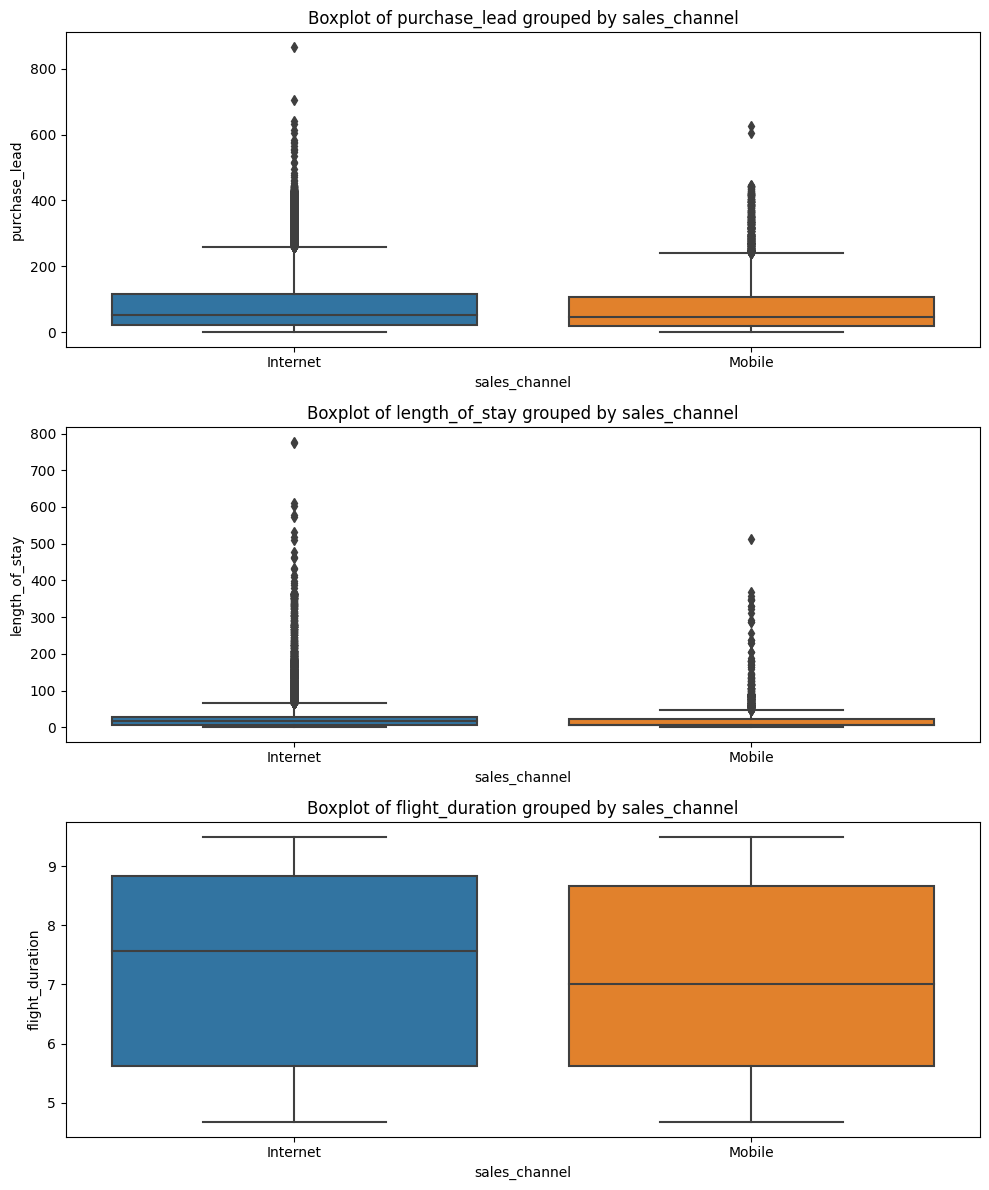

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the variables and grouping column
variables = ['purchase_lead', 'length_of_stay', 'flight_duration']
grouping_column = 'sales_channel'

# Create subplots for each variable
fig, axes = plt.subplots(len(variables), 1, figsize=(10, 12))

# Generate boxplots for each variable grouped by sales_channel
for i, variable in enumerate(variables):
    ax = axes[i]
    sns.boxplot(x=df[grouping_column], y=df[variable], ax=ax)
    ax.set_xlabel(grouping_column)
    ax.set_ylabel(variable)
    ax.set_title(f'Boxplot of {variable} grouped by {grouping_column}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


###TRAINING ML MODEL (RANDOM FOREST) FOR PREDICTING STATUS OF CUSTOMER BOOKING

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])

# Select the features (independent variables) and the target (dependent variable)
features = df_encoded.drop('booking_complete', axis=1)
target = df_encoded['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the RandomForest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a sorted list of feature names and importances
feature_names = features.columns
feature_importance_list = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)


Accuracy: 0.854
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.53      0.13      0.20      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000



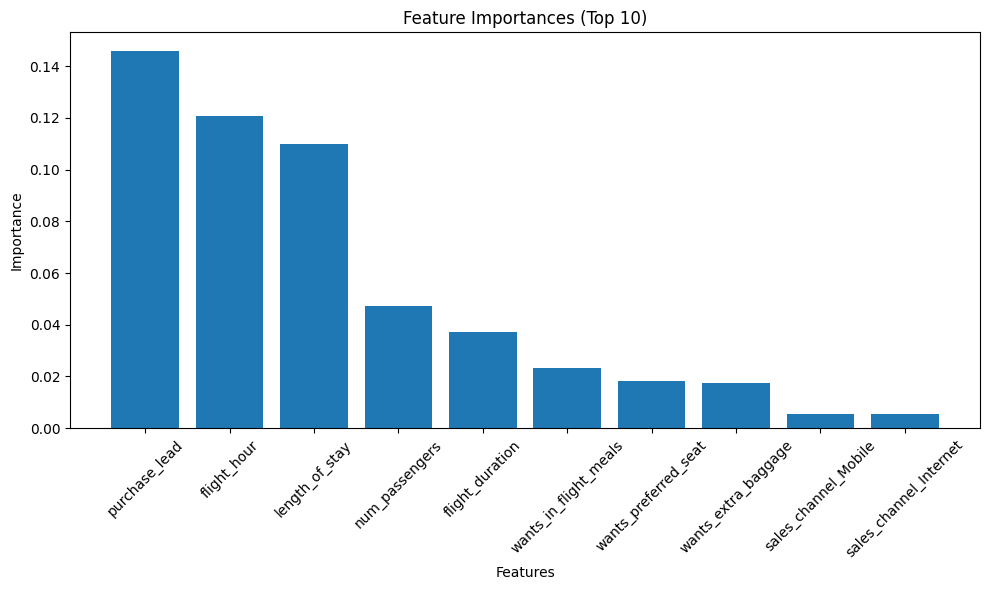

In [ ]:
import matplotlib.pyplot as plt

# Create a sorted list of feature names and importances
feature_names = features.columns[:10]  # Select the first 10 features
feature_importance_list = sorted(zip(feature_names, feature_importances[:10]), key=lambda x: x[1], reverse=True)

# Extract feature names and importances
sorted_feature_names, sorted_feature_importances = zip(*feature_importance_list)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_feature_importances)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances (Top 10)')
plt.tight_layout()
plt.show()


Visualize this!

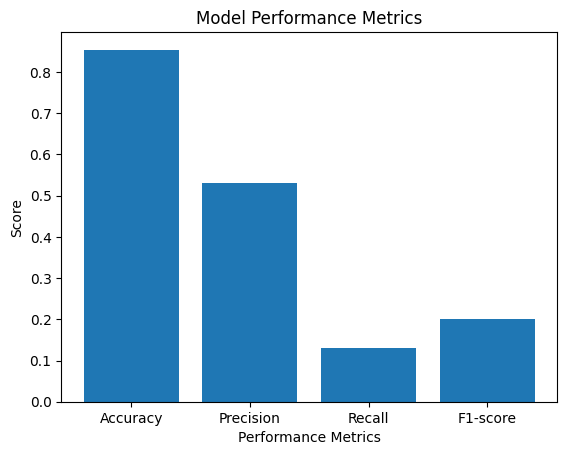

In [ ]:
import matplotlib.pyplot as plt

# Define the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [0.854, 0.53, 0.13, 0.20]

# Create the bar chart
plt.bar(metrics, values)

# Add labels and title
plt.xlabel('Performance Metrics')
plt.ylabel('Score')
plt.title('Model Performance Metrics')

# Show the plot
plt.show()
